# Testes de Hipótese

O objetivo desse notebook é ajudar no cálculo e na visualização de testes de hipótese da média

## Setup

In [1]:
## Importando módulos
# Análise
import numpy as np
import random
import scipy.stats as stats
import math

# Visualização
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Estilos dos gráficos
from matplotlib import style
style.use('ggplot')

In [98]:
def hypothesis_test(nSampleMean: float, nPopulationMean: float, 
                    nVariance: float, nSampleSize: int,
                    bKnownVariance=False, sType='two-sided', nSignificance=.05):
    """
    Does a hypothesis test of the sample mean in order to infer something about the population value.
    Specifically, in the case of a two-sided test, it returns Pr(|t| > t_crit), 
    where t_crit is the critical statistic.
    In the case of a one sided test, it returns Pr(t > t_crit) or Pr(t < t_crit).

    :param nSampleMean: sample mean;
    :param nPopulationMean: population mean (hypothesis);
    :param nVariance: variance of the population or sample;
    :param nSampleSize: size of the sample;
    :param bKnownVariance: boolean; do we know the population variance? Affects whether a T or Z-test is performed;
    :param sType: string; bi or monocaudal test? If monocaudal, specify 'greater' or 'less';
    :param nSignificance: significance level of the test;
    """
    # Defining dictionaries with graphing functions
    listGraph = [
        stats.norm.pdf,
        stats.t.pdf
    ]
    listParameters = [
        dict(loc=0, scale=1),
        dict(df=nSampleSize - 1)
    ]

    # Bessel-correcting variance (if needed)
    nVariance = nVariance if bKnownVariance else nVariance * (nSampleSize) / (nSampleSize - 1)

    # Calculating t-statistic
    t = (nSampleMean - nPopulationMean) / (nVariance / nSampleSize) ** (1 / 2)

    # Calculating critical statistic and p-value
    if bKnownVariance:
        ## Values
        t_crit = stats.norm.ppf(1 - nSignificance / 2)
        p = 2*(1 - stats.norm.cdf(t_crit)) if sType == 'two-sided' else 1 - stats.norm.cdf(t_crit)

        ## Adjusting for monocaudal cases
        if (nSampleMean < nPopulationMean and sType == 'greater') or (nSampleMean > nPopulationMean and sType == 'less'):
            p = 1 - p

        ## Graph
        funcGraph = listGraph[0]
        dictParameters = listParameters[0]
    else:
        ## Values
        nDF = nSampleSize - 1
        t_crit = stats.t.ppf(1 - nSignificance / 2, df=nDF)
        p = 2*(1 - stats.t.cdf(t_crit, df=nDF)) if sType == 'two-sided' else 1 - stats.t.cdf(t_crit, df=nDF)

        ## Adjusting for monocaudal cases
        if (nSampleMean < nPopulationMean and sType == 'greater') or (nSampleMean > nPopulationMean and sType == 'less'):
            p = 1 - p

        ## Graph
        funcGraph = listGraph[1]
        dictParameters = listParameters[1]

    # Printing results
    sResult = "H0 is rejected." if round(p, 3) <= nSignificance else "H0 can't be rejected."
    print(f"The t-statistic is {round(t, 2)} (critical: {round(t_crit, 2)}).")
    print(f"The p-value is {round(p, 3)} and, therefore, {sResult}")

    # Graphing
    ## Axis
    arrX = np.linspace(-4, 4, 100)
    arrY = funcGraph(arrX, **dictParameters)

    ## Distribution
    plt.plot(arrX, arrY)

    ## Dashed Lines
    plt.annotate(text=f"t = {round(t, 2)}", xy=(t + 0.05, 0.38), size=10)
    if sType == 'two-sided':
        plt.vlines(x=[t, -t], ymin=0, ymax=.4, 
                   linestyles='dashed', colors='darkgray')
    else:
        plt.vlines(x=t, ymin=0, ymax=.4, 
                   linestyles='dashed', colors='darkgray')

    ### Filled Area
    if sType == 'two-sided':
        plt.fill_between(x=arrX, y1=arrY, color='red', alpha=.2, 
                        where=abs(arrX) >= abs(t))
    elif sType == 'greater':
        plt.fill_between(x=arrX, y1=arrY, color='red', alpha=.2, 
                        where=arrX >= t)
    else:
        plt.fill_between(x=arrX, y1=arrY, color='red', alpha=.2, 
                        where=arrX <= t)

    ## Título
    sDistribution = "Normal" if bKnownVariance else f"T-Student with {nDF} Degrees of Freedom"
    plt.title(f"Hypothesis Test: {sDistribution}", size=13, fontweight='bold')
    plt.tight_layout()

The t-statistic is -1.97 (critical: 2.02).
The p-value is 0.05 and, therefore, H0 is rejected.


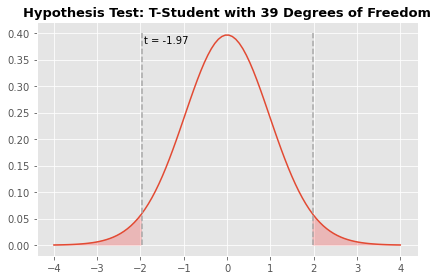

In [101]:
hypothesis_test(nSampleMean=520, 
                nPopulationMean=530, 
                nVariance=1000, 
                nSampleSize=40, 
                bKnownVariance=False, 
                sType='two-sided')